# Feature Scaling:
Feature scaling is the process of `normalizing the range of features` in a dataset. Real-world datasets often contain features that are varying in `degrees of magnitude, range, and units`. Therefore, in order for machine learning models to interpret these features on the `same scale`, we need to perform feature scaling. 
There are two types of feature scaling:
<ul>
    <li>Standardization (`also called z-score normalization`)</li>
    <li>Normalization</li>    
</ul>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("Datasets/social network ads.csv")

In [3]:
df.sample(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
332,15769902,Male,42,65000,0
42,15772798,Male,35,108000,0


In [4]:
df.drop(["User ID","Gender"],axis=1,inplace=True)

In [5]:
df.sample(3)

,Age,EstimatedSalary,Purchased
16,47,25000,1
319,36,60000,0
297,43,112000,1


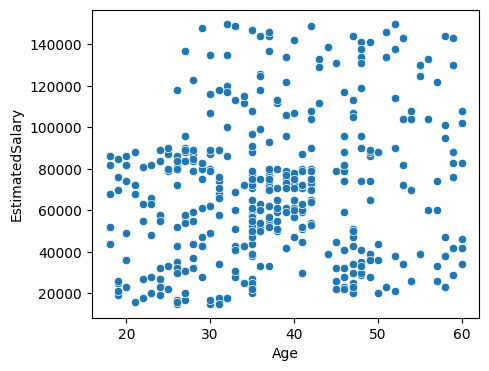

In [6]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=df["Age"] , y=df["EstimatedSalary"] , data=df)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop("Purchased",axis=1),
                                                df["Purchased"],
                                                test_size=0.30,
                                                random_state=0)

x_train.shape , x_test.shape

((280, 2), (120, 2))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [9]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [10]:
x_train.head(3)

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000


In [11]:
x_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [12]:
x_train_scaled_df = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled , columns=x_test.columns)

In [13]:
x_train_scaled_df

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [14]:
import numpy

numpy.round(x_train.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [15]:
numpy.round(x_train_scaled_df.describe() , 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


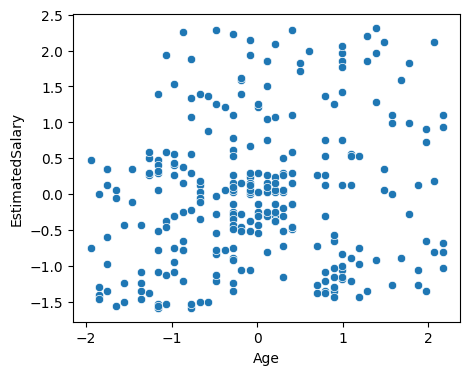

In [16]:
plt.figure(figsize=(5,4))
sns.scatterplot(x=x_train_scaled_df["Age"] , y=x_train_scaled_df["EstimatedSalary"],data= x_train_scaled_df)
plt.show()

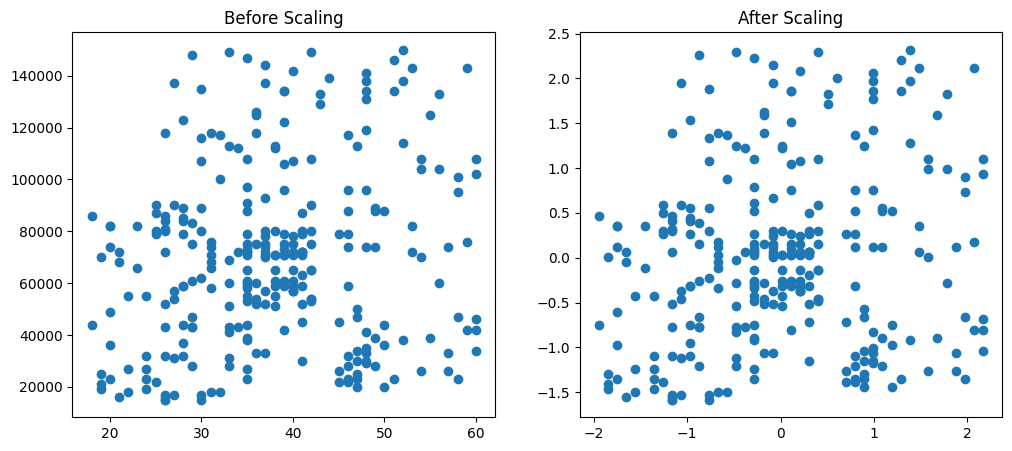

In [17]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(x_train["Age"] , x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled_df["Age"] , x_train_scaled_df["EstimatedSalary"])
ax2.set_title("After Scaling")
plt.show()

# Accuracy improvement in Logistic Regression Model

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [20]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled_df,y_train)

LogisticRegression()

In [21]:
y_pred = lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled_df)

In [22]:
from sklearn.metrics import accuracy_score

print("Actual Dataset : ",accuracy_score(y_pred,y_test))
print("Scaled Dataset : ",accuracy_score(y_pred_scaled,y_test))

Actual Dataset :  0.6583333333333333
Scaled Dataset :  0.8666666666666667


# No accuracy improvement in Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [25]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled_df,y_train)

DecisionTreeClassifier()

In [26]:
dt_pred = dt.predict(x_test)
dt_pred_scaled = dt_scaled.predict(x_test_scaled_df)

In [27]:
print("Actual Dataset : " , accuracy_score(dt_pred,y_test))
print("Scaled Dataset : " , accuracy_score(dt_pred_scaled,y_test))

Actual Dataset :  0.875
Scaled Dataset :  0.8666666666666667


# If Dataset has Outlier

In [28]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [29]:
df.head(2)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0


In [30]:
new_df = pd.DataFrame({"Age":[9,98,120] , "EstimatedSalary":[2000,350000,450000] , "Purchased":[0,1,1]})

In [31]:
new_df

,Age,EstimatedSalary,Purchased
0,9,2000,0
1,98,350000,1
2,120,450000,1


In [32]:
df = pd.concat([df,new_df] , ignore_index=True)

In [33]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,9,2000,0
401,98,350000,1


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

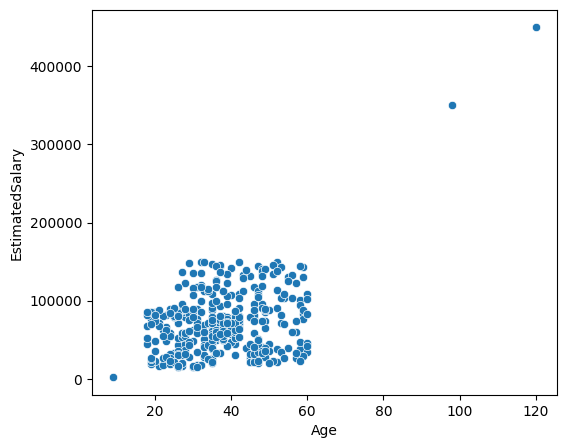

In [34]:
plt.figure(figsize=(6,5))
sns.scatterplot(x=df["Age"] , y=df["EstimatedSalary"])

In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df.drop("Purchased",axis=1),
                                                df["Purchased"],
                                                test_size=0.30,
                                                random_state=0)

x_train.shape , x_test.shape

((282, 2), (121, 2))

In [36]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

st.fit(x_train)

x_train_scaled = st.transform(x_train)
x_test_scaled = st.transform(x_test)

In [37]:
x_train_scaled_df = pd.DataFrame(x_train_scaled , columns=x_train.columns)
x_test_scaled_df = pd.DataFrame(x_test_scaled , columns=x_test.columns)

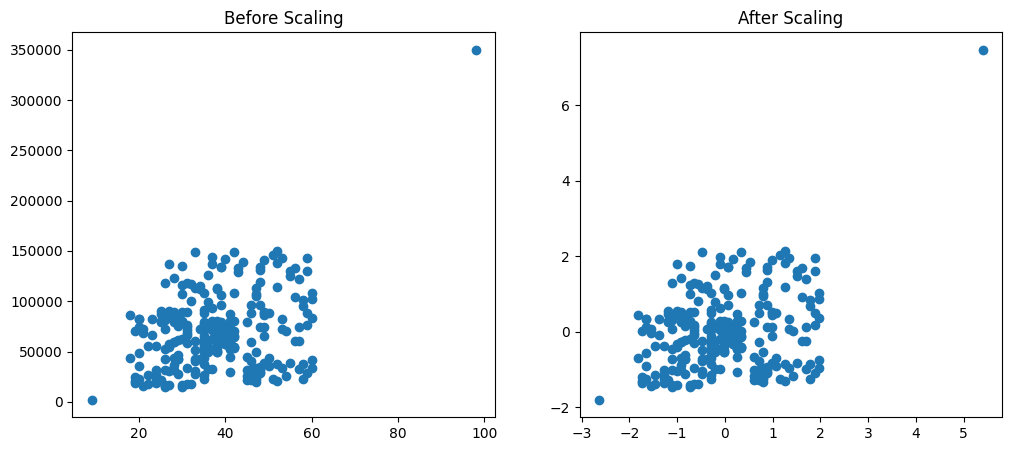

In [38]:
fig , (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))

ax1.scatter(x_train["Age"] , x_train["EstimatedSalary"])
ax1.set_title("Before Scaling")

ax2.scatter(x_train_scaled_df["Age"] , x_train_scaled_df["EstimatedSalary"])
ax2.set_title("After Scaling")
plt.show()

## How, if we will use MinMaxScaler